# Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.


For this challenge, we'll be going through the Titanic dataset. The known target in this dataset is the boolean feature *Survival*:

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [2]:
data = pd.read_csv('ThoracicSurgery.csv')
data.head()

,Unnamed: 0,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_Scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoker,Asthmatic,Age,Death_1yr
0,0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


This looks like a simple dataset with a few features to play with. Let's see how many of these features need cleaning:

In [3]:
data.isnull().sum()

Unnamed: 0           0
Diagnosis            0
Forced_Capacity      0
Forced_Expiration    0
Zubrod_Scale         0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes             0
MI_6mo               0
PAD                  0
Smoker               0
Asthmatic            0
Age                  0
Death_1yr            0
dtype: int64

The dataset seems to be clean and ready to feed into the decision tree. First, let's explore of feature distributions and make sure we understand all of them before proceeding:

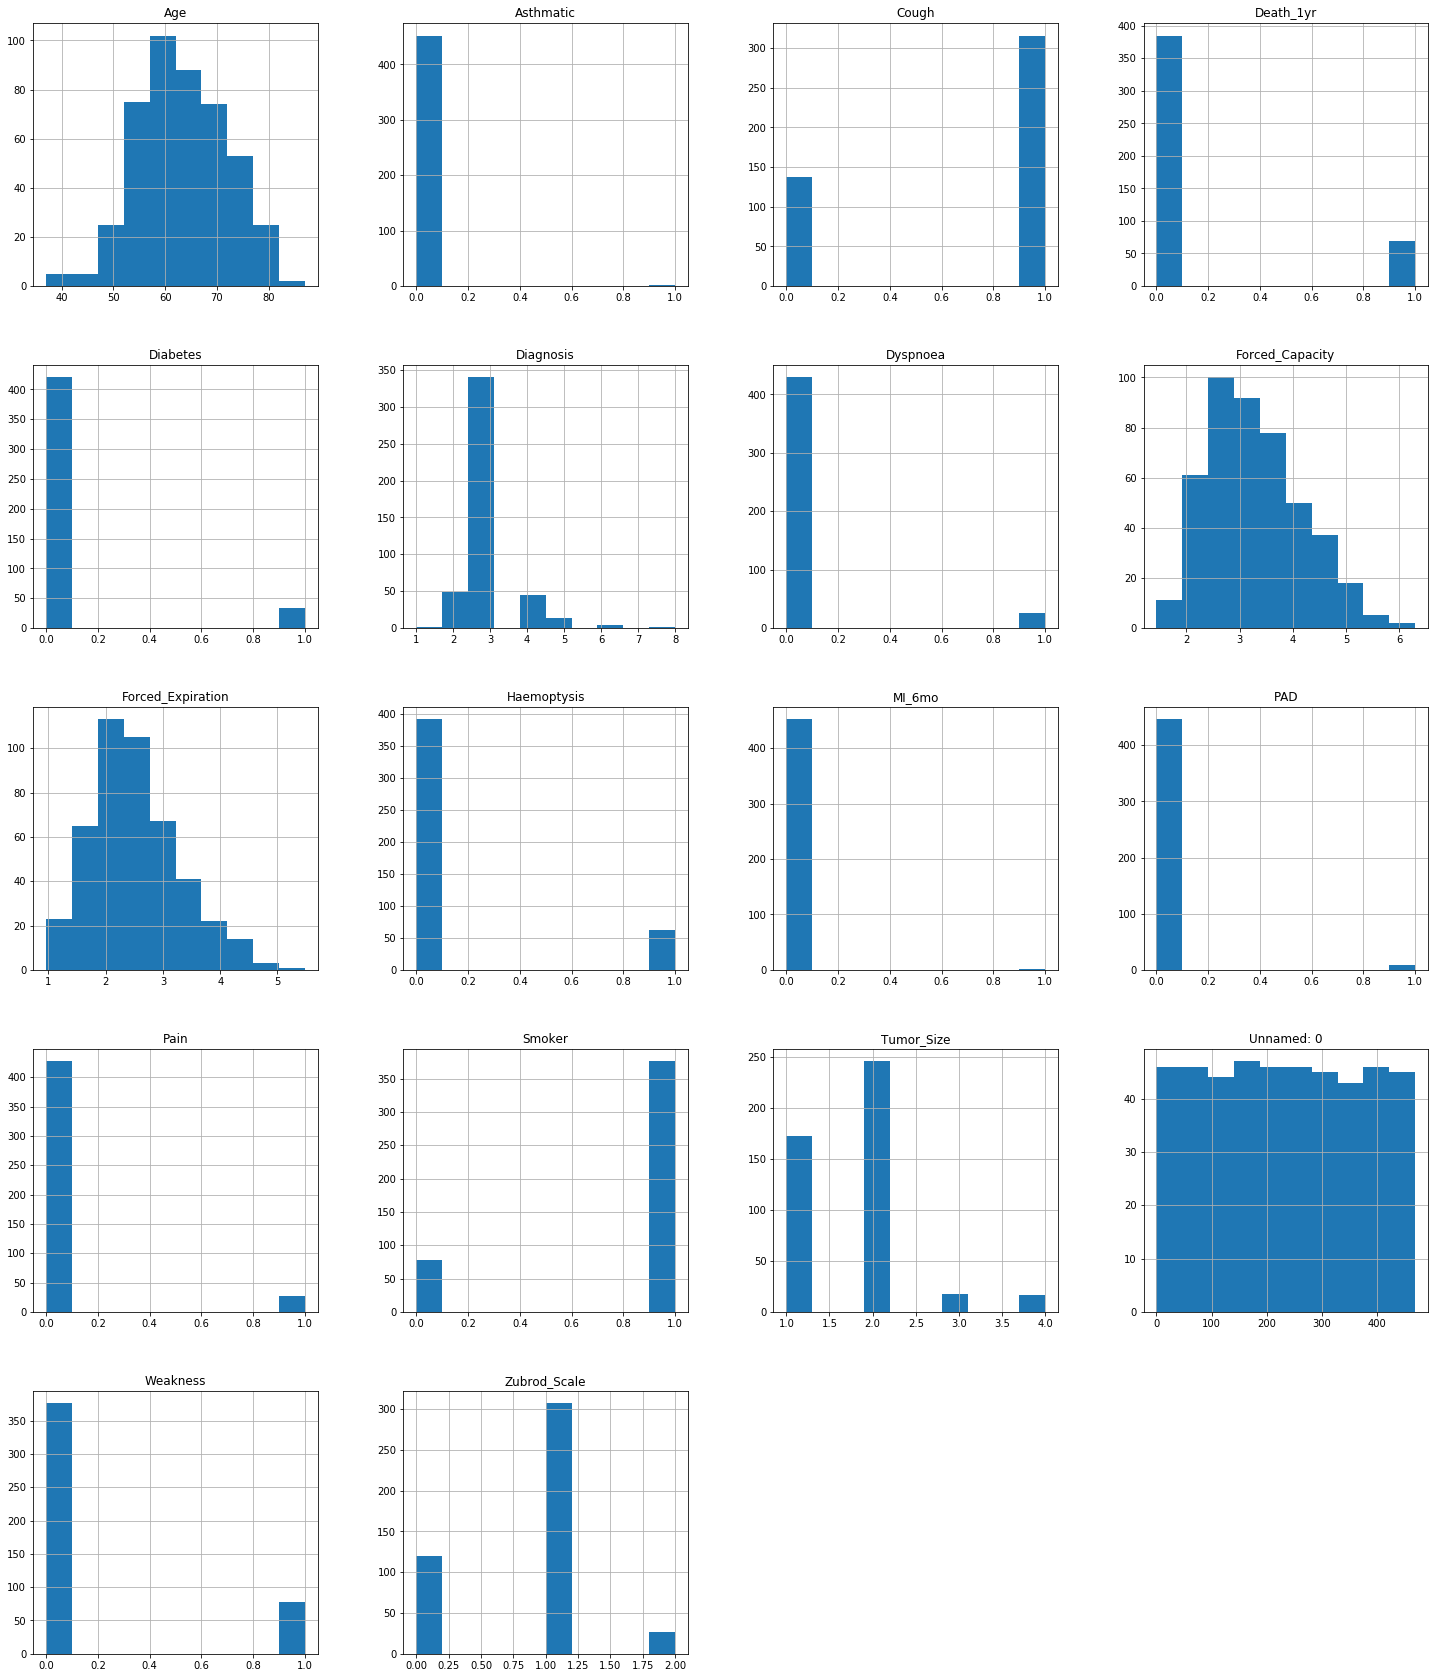

In [4]:
data.hist(figsize=(25,30))
plt.show()

In [5]:
X = data.drop(columns=['Death_1yr'])
Y = data['Death_1yr']

Now that we have split our target and features, let's start building our models:

In [6]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=20,
    random_state = 1337
)


# %timeit decision_tree.fit(X, Y)
# %timeit decision_tree.score(X,Y)

%timeit decision_tree.fit(X, Y)
%timeit print(decision_tree.score(X,Y))

1.52 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


We got 100% which is quite excellent accuracy for decision tree. However, this may be due to the tendancy of decision trees to overfit. 

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree.

In [7]:
random_forest = ensemble.RandomForestClassifier(n_estimators=44,max_depth=30)
%timeit random_forest.fit(X, Y)
%timeit print(random_forest.score(X,Y))

31.7 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814

0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704845814
0.9933920704

The number of estimators - or *trees*- in random forest here is 44, so it is expected to be much more time and resource consuming. Training the decision tree model took 1.52 milliseconds on average while random forest took about 32 ms. This is a significant and expected difference.